In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from criticalZoom import critical_zoom
from timebudget import timebudget
timebudget.set_quiet(False)  # don't show measurements as they happen
timebudget.report_at_exit(True)  # Generate report when the program exits


In [3]:
tmin=140
tmax=350
numtemp=25



#light quark mass
ml=30

#chemical potential
mu=0

lambda1= -4.25 #parameter for mixing between dilaton and chiral field

minsigma=0
maxsigma=1200

mu0=430
mu1=830
mu2=176

order, iterationNumber, sigma_list,temps_list,Tc=critical_zoom(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,mu0,mu1,mu2)




/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt

get_all_sigmas_parallel took 123.620sec
Crossover or 2nd order
Pseudo-Critical temperature is between 306.25 341.25
Iteration number  1
get_all_sigmas_parallel took 65.145sec
First order
Critical temperature is  325.2083333333333
Iteration number  2
critical_zoom took 188.844sec


In [6]:
max(sigma_list[0][:,0])

712.0

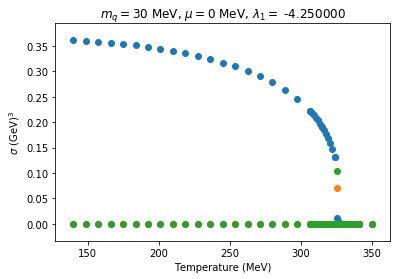

In [7]:
#plot all the sigma values for each iteration
#get the standard colors for matplotlib
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

#find the index of when sigma_list[0][:,0] has its first zero value
#this is the index of the first temperature where the sigma value is zero

max_index=np.argmax(sigma_list[0][:,0]==0)
#find the value of the temperature at this index
max_temp=temps_list[0][max_index]



for i in range(len(sigma_list)):
    plt.scatter(temps_list[i],(sigma_list[i][:,0]/1000)**3,color=colors[0])
    plt.scatter(temps_list[i],(sigma_list[i][:,1]/1000)**3,color=colors[1])
    plt.scatter(temps_list[i],(sigma_list[i][:,2]/1000)**3,color=colors[2])
plt.xlabel("Temperature (MeV)")
plt.ylabel("$\sigma$ (GeV)$^3$")
#set the x range
# plt.xlim(temps_list[0][0],max_temp)
plt.title(r'$m_q=%i$ MeV, $\mu=%i$ MeV, $\lambda_1=$ %f' %(ml,mu,lambda1))
plt.show()
    

## Save critical point data
Use the following code to append the current data about this transition to the saved file

In [302]:
# Create a DataFrame from your values
df = pd.DataFrame([(ml, lambda1, mu, Tc, order)], columns=['ml', 'lambda', 'mu', 'Tc', 'order'])

filename = 'critical_temp.csv'

# Check if file exists
if os.path.isfile(filename):
    # If file exists, load the old file
    df_old = pd.read_csv(filename)

    # Append the new data
    df = pd.concat([df_old, df], ignore_index=True)

# Save to csv file
df.to_csv(filename, index=False)

## Save all of the plotted data

In [303]:
# Save the data as a pandas dataframe
df_all_list = []
for i in range(len(sigma_list)):
    df=pd.DataFrame()
    df['temps']=temps_list[i]
    df['sigma1']=(sigma_list[i][:,0]/1000)**3   
    df['sigma2']=(sigma_list[i][:,1]/1000)**3
    df['sigma3']=(sigma_list[i][:,2]/1000)**3
    df['order']=order
    df['ml']=ml
    df['mu']=mu
    df['lambda1']=lambda1
    df['Tc']=Tc
    df_all_list.append(df)

# Use pandas concat here
df_all = pd.concat(df_all_list)

#pickle the data frame
df_all.to_pickle('data/chiral_transition_mq%i_mu%i_lambda%f_order%i.pkl' %(ml,mu,lambda1,order))



In [ ]:
#load the data frame from the pickle file
df2=pd.read_pickle('chiral_transition_mq%i_mu%i_lambda%f_order%i.pkl' %(ml,mu,lambda1,order))

#plot the data frame
df2.plot.scatter(x='temps',y=['sigma'])
plt.xlabel("Temperature (MeV)")
plt.ylabel("$\sigma$ (GeV$^3$)")
plt.title(r'$m_q=%i$ MeV, $\mu=%i$ MeV, $\lambda_1=$ %f' %(ml,mu,lambda1))
plt.show()

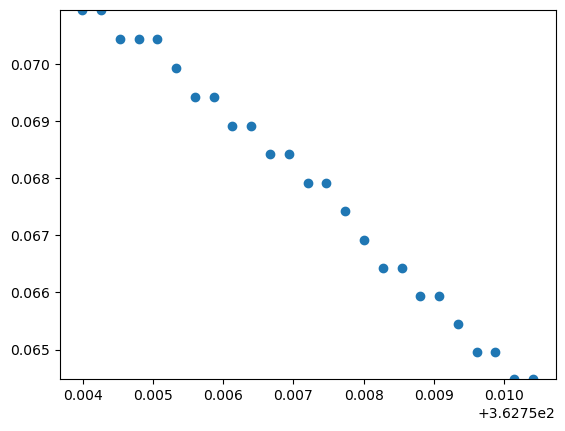

In [283]:
i=1
#plot the most zoomed-in data
plt.scatter(temps_list[-i],(sigma_list[-i][:,0]/1000)**3,color=colors[0])
plt.scatter(temps_list[-i],(sigma_list[-i][:,1]/1000)**3,color=colors[1])
plt.scatter(temps_list[-i],(sigma_list[-i][:,2]/1000)**3,color=colors[2])
plt.ylim(min((sigma_list[-i][:,0]/1000)**3),max((sigma_list[-i][:,0]/1000)**3))
plt.show()

In [194]:
sigma_list[-1]

array([[328.,   0.,   0.],
       [328.,   0.,   0.],
       [327.,   0.,   0.],
       [327.,   0.,   0.],
       [327.,   0.,   0.],
       [326.,   0.,   0.],
       [326.,   0.,   0.],
       [326.,   0.,   0.],
       [325.,   0.,   0.],
       [325.,   0.,   0.],
       [325.,   0.,   0.],
       [324.,   0.,   0.],
       [324.,   0.,   0.],
       [324.,   0.,   0.],
       [323.,   0.,   0.],
       [321., 322., 323.],
       [321.,   0.,   0.],
       [320.,   0.,   0.],
       [320.,   0.,   0.],
       [320.,   0.,   0.],
       [319.,   0.,   0.],
       [319.,   0.,   0.],
       [319.,   0.,   0.],
       [318.,   0.,   0.],
       [318.,   0.,   0.]])